# Sistemas: resolucion numerica

## Librerias 

Para implementar los sistemas discretos, calcular la **respuesta impulsional** y aplicar la **Transformada de Fourier en Tiempo Discreto (TFTD)**, se utilizan las siguientes librerías y funciones de **Python**:

- **NumPy** es fundamental para realizar cálculos numéricos en Python.  
- **Matplotlib** se utiliza para **graficar** los resultados obtenidos. Permite visualizar tanto señales en el **dominio del tiempo** como en el **dominio de la frecuencia**.    

- `np.zeros(N)`: Crea un arreglo de ceros con $ N $ elementos.  
- `np.arange(start, stop)`: Crea una secuencia de números entre `start` y `stop`.  
- `np.convolve(x, h, mode)`: Realiza la convolución entre dos señales.  
- `np.fft.fft(h)`: Calcula la **Transformada de Fourier** de la señal $ h $.  
- `np.fft.fftfreq(N, d)`: Devuelve las frecuencias correspondientes a la FFT.  

- `plt.stem(x, y)`: Grafica una señal **discreta**.  
- `plt.plot(x, y)`: Grafica una señal **continua** o en el dominio de la frecuencia.  
- `plt.title()`, `plt.xlabel()`, `plt.ylabel()`: Añaden títulos y etiquetas a los gráficos.  
- `plt.grid()`: Activa la cuadrícula en el gráfico.

Se utilizan funciones personalizadas para implementar cada uno de los sistemas en forma de **convolución**. Cada sistema será una función que recibirá una señal de entrada $ x[n] $ y devolverá la señal de salida $ y[n] $.

**Método**:  
- La respuesta de cada sistema se obtiene utilizando la **convolución** entre la entrada $ x[n] $ y la **respuesta impulsional** $ h[n] $.  
- Se aplicará la **TFTD** (mediante `np.fft.fft`) a la respuesta impulsional para verificar que coincide con la respuesta en frecuencia analítica.

## Sistema 1

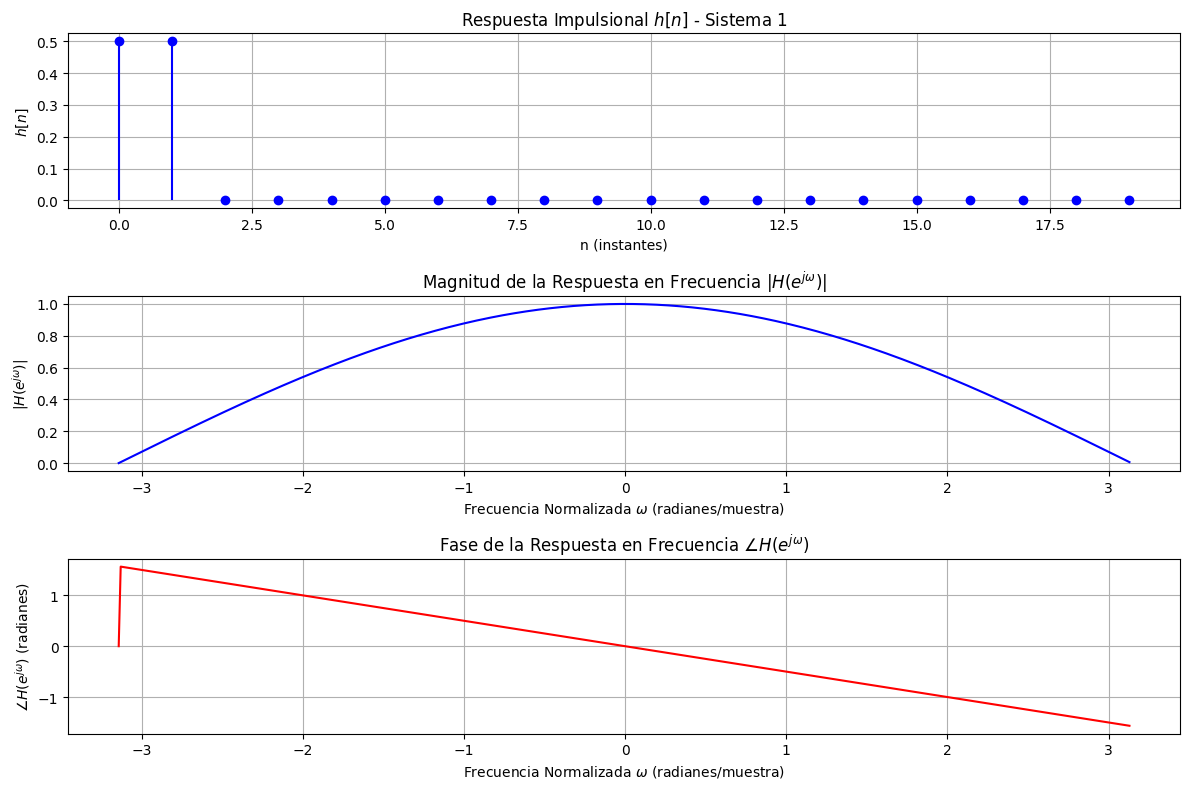

In [5]:
import numpy as np
import matplotlib.pyplot as plt

# Función que implementa el Sistema 1
def sistema1(x):
    """
    Implementa el sistema 1: y[n] = 0.5*x[n] + 0.5*x[n-1]
    Entrada: x -> Señal de entrada
    Salida: y -> Señal de salida
    """
    N = len(x)
    y = np.zeros(N)  # Inicializa la salida con ceros
    for n in range(N):
        y[n] = 0.5 * x[n]  # Primer término
        if n > 0:
            y[n] += 0.5 * x[n-1]  # Segundo término (desplazado)
    return y

# Generar la señal de entrada: impulso unitario δ[n]
N = 20  # Duración de la señal
delta = np.zeros(N)
delta[0] = 1  # Impulso en n = 0

# Calcular la respuesta impulsional h[n]
h = sistema1(delta)

# Calcular la Transformada de Fourier (FFT) de h[n]
H = np.fft.fft(h, n=512)  # FFT con 512 puntos para mayor resolución
frequencies = np.fft.fftfreq(512, d=1) * 2 * np.pi  # Frecuencias normalizadas entre -π y π
H_shifted = np.fft.fftshift(H)  # Centrar la FFT en ω = 0
frequencies_shifted = np.fft.fftshift(frequencies)

# Calcular la magnitud y fase
magnitude = np.abs(H_shifted)
phase = np.angle(H_shifted)

# Graficar los resultados
plt.figure(figsize=(12, 8))

# Respuesta impulsional h[n]
plt.subplot(3, 1, 1)
plt.stem(range(N), h, basefmt=" ", linefmt="b-", markerfmt="bo")
plt.title("Respuesta Impulsional $h[n]$ - Sistema 1")
plt.xlabel("n (instantes)")
plt.ylabel("$h[n]$")
plt.grid()

# Magnitud de la respuesta en frecuencia |H(e^jw)|
plt.subplot(3, 1, 2)
plt.plot(frequencies_shifted, magnitude, color='b')
plt.title(r"Magnitud de la Respuesta en Frecuencia $|H(e^{j\omega})|$")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$|H(e^{j\omega})|$")
plt.grid()

# Fase de la respuesta en frecuencia ∠H(e^jw)
plt.subplot(3, 1, 3)
plt.plot(frequencies_shifted, phase, color='r')
plt.title(r"Fase de la Respuesta en Frecuencia $\angle H(e^{j\omega})$")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$\angle H(e^{j\omega})$ (radianes)")
plt.grid()

plt.tight_layout()
plt.show()


## Sistema 2

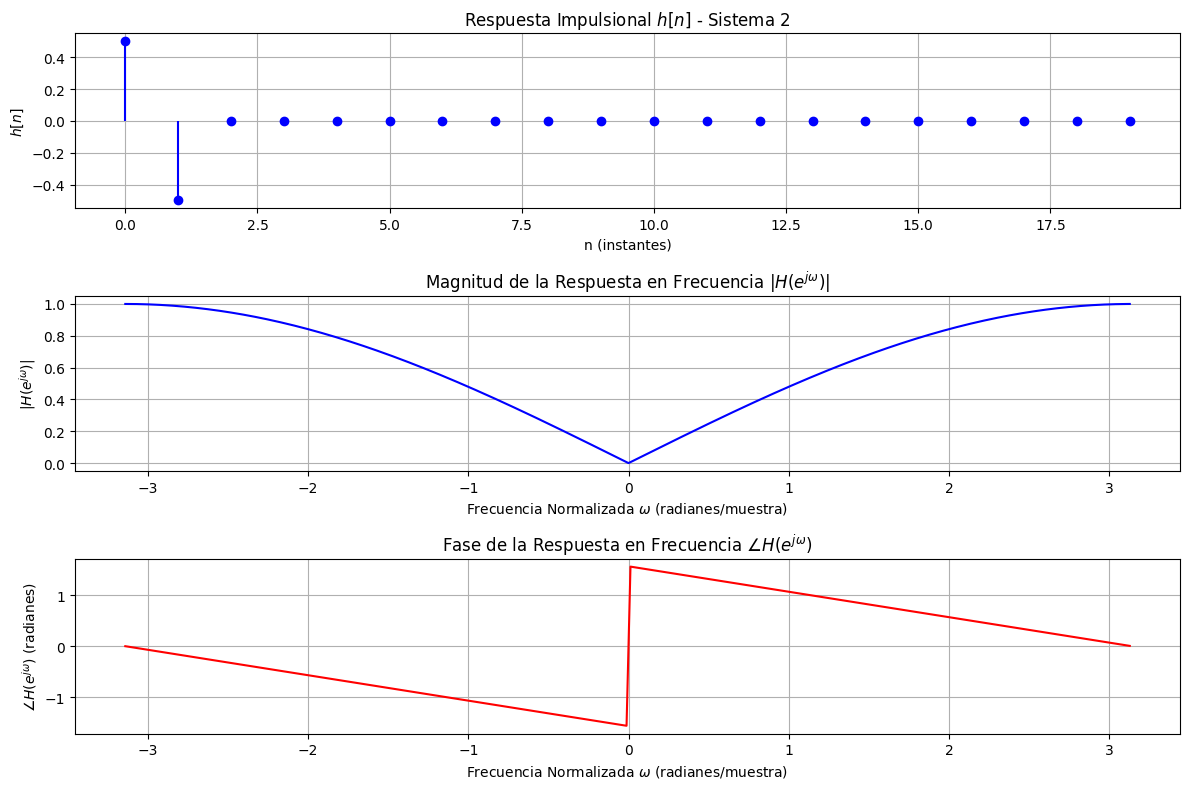

In [6]:
import numpy as np
import matplotlib.pyplot as plt

# Función que implementa el Sistema 2
def sistema2(x):
    """
    Implementa el sistema 2: y[n] = 0.5*x[n] - 0.5*x[n-1]
    Entrada: x -> Señal de entrada
    Salida: y -> Señal de salida
    """
    N = len(x)
    y = np.zeros(N)  # Inicializa la salida con ceros
    for n in range(N):
        y[n] = 0.5 * x[n]  # Primer término
        if n > 0:
            y[n] -= 0.5 * x[n-1]  # Segundo término (desplazado y restado)
    return y

# Generar la señal de entrada: impulso unitario δ[n]
N = 20  # Duración de la señal
delta = np.zeros(N)
delta[0] = 1  # Impulso en n = 0

# Calcular la respuesta impulsional h[n]
h = sistema2(delta)

# Calcular la Transformada de Fourier (FFT) de h[n]
H = np.fft.fft(h, n=512)  # FFT con 512 puntos
frequencies = np.fft.fftfreq(512, d=1) * 2 * np.pi  # Frecuencias normalizadas entre -π y π
H_shifted = np.fft.fftshift(H)  # Centrar la FFT en ω = 0
frequencies_shifted = np.fft.fftshift(frequencies)

# Calcular la magnitud y la fase
magnitude = np.abs(H_shifted)
phase = np.angle(H_shifted)

# Graficar los resultados
plt.figure(figsize=(12, 8))

# Respuesta impulsional h[n]
plt.subplot(3, 1, 1)
plt.stem(range(N), h, basefmt=" ", linefmt="b-", markerfmt="bo")
plt.title("Respuesta Impulsional $h[n]$ - Sistema 2")
plt.xlabel("n (instantes)")
plt.ylabel(r"$h[n]$")
plt.grid()

# Magnitud de la respuesta en frecuencia |H(e^jw)|
plt.subplot(3, 1, 2)
plt.plot(frequencies_shifted, magnitude, color='b')
plt.title(r"Magnitud de la Respuesta en Frecuencia $|H(e^{j\omega})|$")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$|H(e^{j\omega})|$")
plt.grid()

# Fase de la respuesta en frecuencia ∠H(e^jw)
plt.subplot(3, 1, 3)
plt.plot(frequencies_shifted, phase, color='r')
plt.title(r"Fase de la Respuesta en Frecuencia $\angle H(e^{j\omega})$")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$\angle H(e^{j\omega})$ (radianes)")
plt.grid()

plt.tight_layout()
plt.show()


## Sistema 3

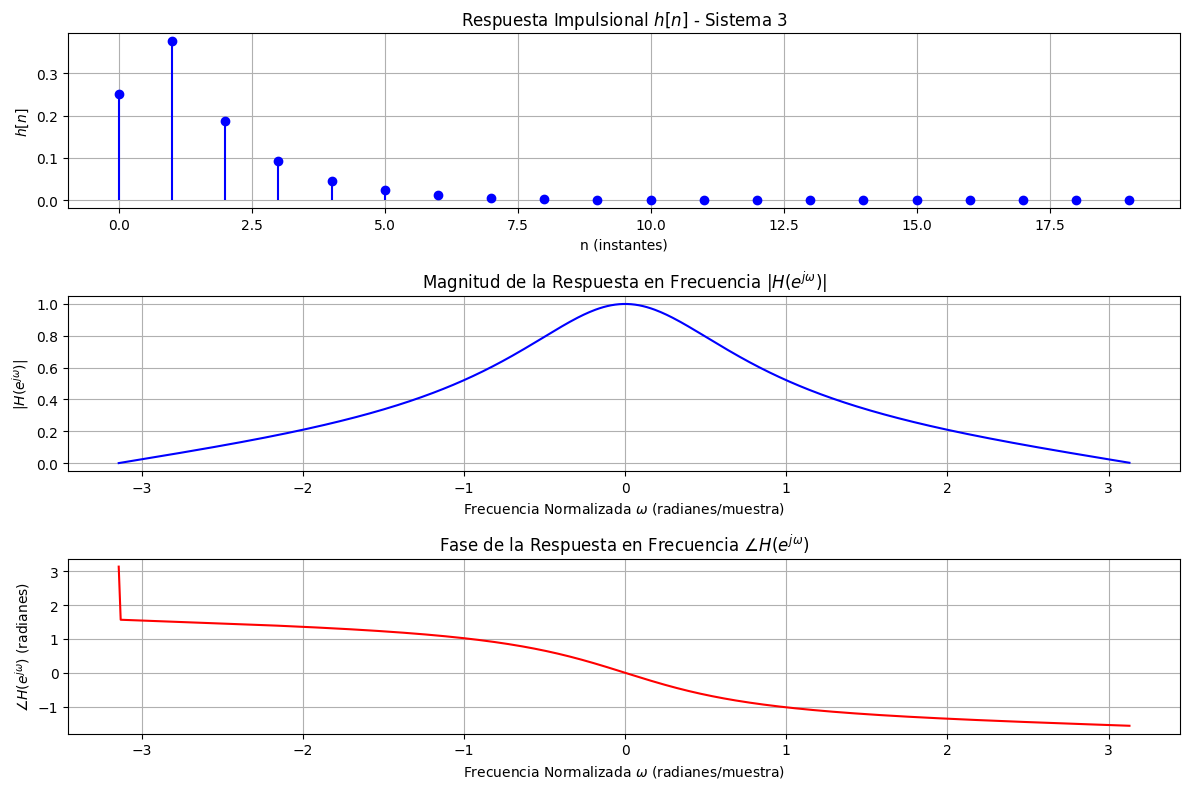

In [7]:
import numpy as np
import matplotlib.pyplot as plt

# Función que implementa el Sistema 3
def sistema3(x):
    """
    Implementa el sistema 3: y[n] = 0.25*x[n] + 0.25*x[n-1] + 0.5*y[n-1]
    Entrada: x -> Señal de entrada
    Salida: y -> Señal de salida
    """
    N = len(x)
    y = np.zeros(N)  # Inicializa la salida con ceros
    for n in range(N):
        y[n] = 0.25 * x[n]  # Primer término
        if n > 0:
            y[n] += 0.25 * x[n-1]  # Segundo término (desplazado)
            y[n] += 0.5 * y[n-1]   # Término recursivo
    return y

# Generar la señal de entrada: impulso unitario δ[n]
N = 20  # Duración de la señal
delta = np.zeros(N)
delta[0] = 1  # Impulso en n = 0

# Calcular la respuesta impulsional h[n]
h = sistema3(delta)

# Calcular la Transformada de Fourier (FFT) de h[n]
H = np.fft.fft(h, n=512)  # FFT con 512 puntos
frequencies = np.fft.fftfreq(512, d=1) * 2 * np.pi  # Frecuencias normalizadas entre -π y π
H_shifted = np.fft.fftshift(H)  # Centrar la FFT en ω = 0
frequencies_shifted = np.fft.fftshift(frequencies)

# Calcular la magnitud y la fase
magnitude = np.abs(H_shifted)
phase = np.angle(H_shifted)

# Graficar los resultados
plt.figure(figsize=(12, 8))

# Respuesta impulsional h[n]
plt.subplot(3, 1, 1)
plt.stem(range(N), h, basefmt=" ", linefmt="b-", markerfmt="bo")
plt.title("Respuesta Impulsional $h[n]$ - Sistema 3")
plt.xlabel("n (instantes)")
plt.ylabel(r"$h[n]$")
plt.grid()

# Magnitud de la respuesta en frecuencia |H(e^jw)|
plt.subplot(3, 1, 2)
plt.plot(frequencies_shifted, magnitude, color='b')
plt.title(r"Magnitud de la Respuesta en Frecuencia $|H(e^{j\omega})|$")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$|H(e^{j\omega})|$")
plt.grid()

# Fase de la respuesta en frecuencia ∠H(e^jw)
plt.subplot(3, 1, 3)
plt.plot(frequencies_shifted, phase, color='r')
plt.title(r"Fase de la Respuesta en Frecuencia $\angle H(e^{j\omega})$")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$\angle H(e^{j\omega})$ (radianes)")
plt.grid()

plt.tight_layout()
plt.show()


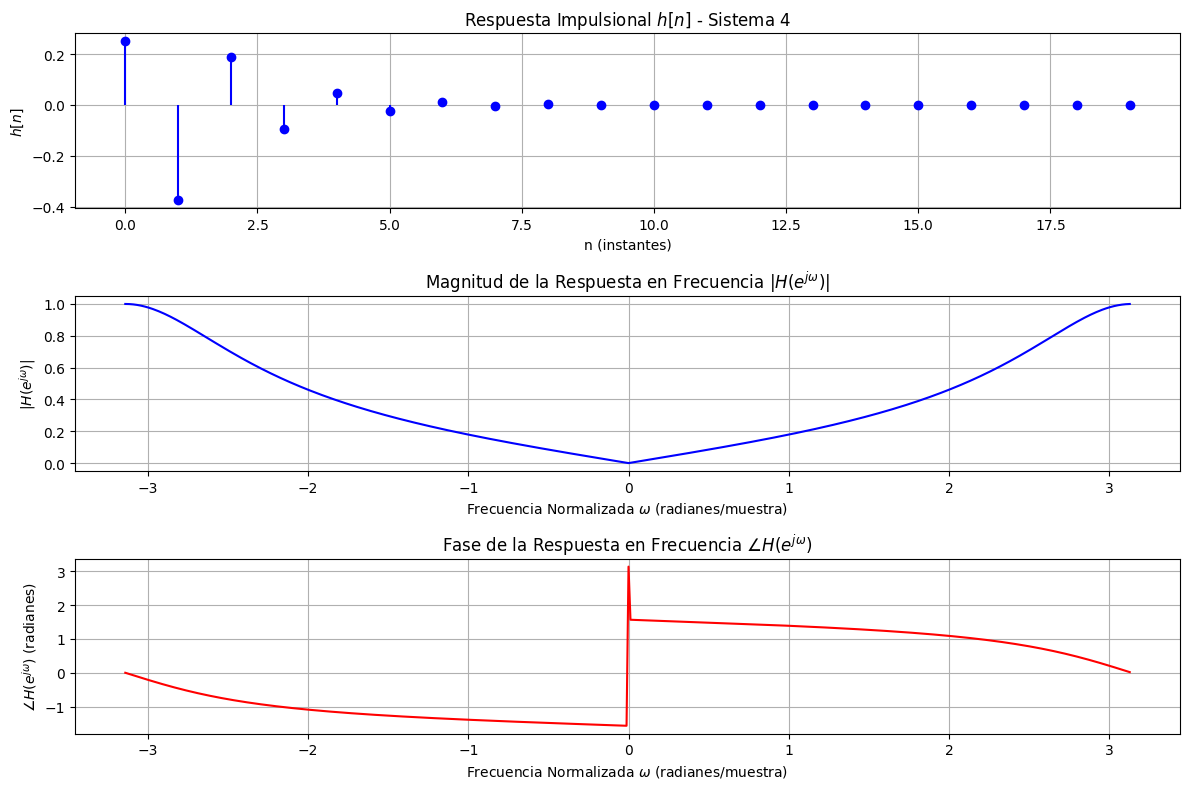

In [8]:
import numpy as np
import matplotlib.pyplot as plt

# Función que implementa el Sistema 4
def sistema4(x):
    """
    Implementa el sistema 4: y[n] = 0.25*x[n] - 0.25*x[n-1] - 0.5*y[n-1]
    Entrada: x -> Señal de entrada
    Salida: y -> Señal de salida
    """
    N = len(x)
    y = np.zeros(N)  # Inicializa la salida con ceros
    for n in range(N):
        y[n] = 0.25 * x[n]  # Primer término
        if n > 0:
            y[n] -= 0.25 * x[n-1]  # Segundo término (desplazado y restado)
            y[n] -= 0.5 * y[n-1]   # Término recursivo (negativo)
    return y

# Generar la señal de entrada: impulso unitario δ[n]
N = 20  # Duración de la señal
delta = np.zeros(N)
delta[0] = 1  # Impulso en n = 0

# Calcular la respuesta impulsional h[n]
h = sistema4(delta)

# Calcular la Transformada de Fourier (FFT) de h[n]
H = np.fft.fft(h, n=512)  # FFT con 512 puntos
frequencies = np.fft.fftfreq(512, d=1) * 2 * np.pi  # Frecuencias normalizadas entre -π y π
H_shifted = np.fft.fftshift(H)  # Centrar la FFT en ω = 0
frequencies_shifted = np.fft.fftshift(frequencies)

# Calcular la magnitud y la fase
magnitude = np.abs(H_shifted)
phase = np.angle(H_shifted)

# Graficar los resultados
plt.figure(figsize=(12, 8))

# Respuesta impulsional h[n]
plt.subplot(3, 1, 1)
plt.stem(range(N), h, basefmt=" ", linefmt="b-", markerfmt="bo")
plt.title("Respuesta Impulsional $h[n]$ - Sistema 4")
plt.xlabel("n (instantes)")
plt.ylabel(r"$h[n]$")
plt.grid()

# Magnitud de la respuesta en frecuencia |H(e^jw)|
plt.subplot(3, 1, 2)
plt.plot(frequencies_shifted, magnitude, color='b')
plt.title(r"Magnitud de la Respuesta en Frecuencia $|H(e^{j\omega})|$")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$|H(e^{j\omega})|$")
plt.grid()

# Fase de la respuesta en frecuencia ∠H(e^jw)
plt.subplot(3, 1, 3)
plt.plot(frequencies_shifted, phase, color='r')
plt.title(r"Fase de la Respuesta en Frecuencia $\angle H(e^{j\omega})$")
plt.xlabel(r"Frecuencia Normalizada $\omega$ (radianes/muestra)")
plt.ylabel(r"$\angle H(e^{j\omega})$ (radianes)")
plt.grid()

plt.tight_layout()
plt.show()
